In [29]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 

#### 1. Carga y estudio de la estructura del dataset

In [30]:
# Cargamos el dataset 
data = pd.read_csv('equipment_anomaly_data.csv')

In [31]:
# Mostramos cantidad total de registros y columnas
data.shape

# Guardamos la variable target
target = 'faulty'

In [32]:
# Mostramos el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [33]:
# Decribimos las columnas numericas
data.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [34]:
# Mostramos los primeros y los ultimos 5 registros 
# Mostramos los primeros 5 registros
data.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [35]:
# Mostramos los últimos 5 registros
data.tail()

,temperature,pressure,vibration,humidity,equipment,location,faulty
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0
7671,28.468054,66.588978,4.677368,79.670225,Turbine,Chicago,1.0


#### 2. Limpieza de datos (data cleaning)

##### 2.1 Visualizacion de outliers mediante boxplots

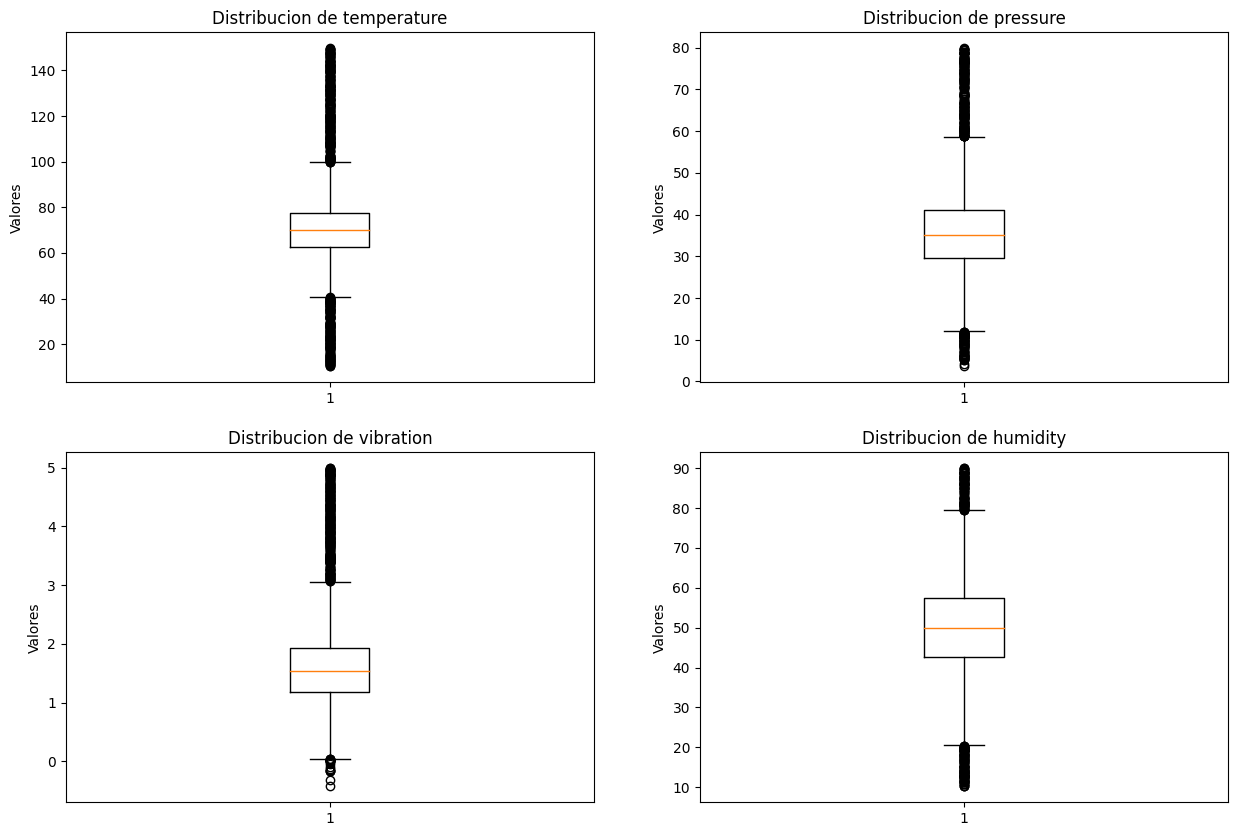

In [36]:
columnas_outliers = ['temperature','pressure','vibration','humidity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(columnas_outliers):
    axes[i].boxplot(data[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(columnas_outliers), len(axes)):
    axes[j].axis('off')

plt.show()

#### 2.2 Eliminacion de outliers mediante la deteccion del rango intercuartilico

In [37]:
# Eliminacion de outliers mediante deteccion del rango intercuartilico
for col in columnas_outliers:
     # Calcular el primer y tercer cuartil
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    data_clean = data[(data[col]>= limite_inferior) & (data[col] <= limite_superior)]



print("Cantidad de datos antes de la limpieza:", data.shape[0])
print("Cantidad de datos despues de la limpieza:", data_clean.shape[0])

Cantidad de datos antes de la limpieza: 7672
Cantidad de datos despues de la limpieza: 7461


#### 2.4 Modificamos valores no numericos en numericos mediante tecnicas de remplazo

In [38]:
#Convertimos la columna target de float a int
data_clean[target] = data_clean[target].astype(int)
# Utilizos la tecnica One-Hot Encoding en las columnas equipment,location
data_encoded = pd.get_dummies(data_clean, columns=['equipment','location'], dtype=int)

#Verificamos que todas las columnas son numericas
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 0 to 7670
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             7461 non-null   float64
 1   pressure                7461 non-null   float64
 2   vibration               7461 non-null   float64
 3   humidity                7461 non-null   float64
 4   faulty                  7461 non-null   int64  
 5   equipment_Compressor    7461 non-null   int64  
 6   equipment_Pump          7461 non-null   int64  
 7   equipment_Turbine       7461 non-null   int64  
 8   location_Atlanta        7461 non-null   int64  
 9   location_Chicago        7461 non-null   int64  
 10  location_Houston        7461 non-null   int64  
 11  location_New York       7461 non-null   int64  
 12  location_San Francisco  7461 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 816.0 KB
None
   temperature   pressure  vibration   humidit

/tmp/ipykernel_1424/3024820577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[target] = data_clean[target].astype(int)


#### ⚖ 3. Balanceo del dataset 

In [39]:
class_types = data_encoded[target].value_counts()
class_proportion = data_encoded[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))


Tipos de clases
faulty
0    6886
1     575
Name: count, dtype: int64
Proporcion de clases
faulty
0    92.29
1     7.71
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribución de clases antes de balancear el dataset')

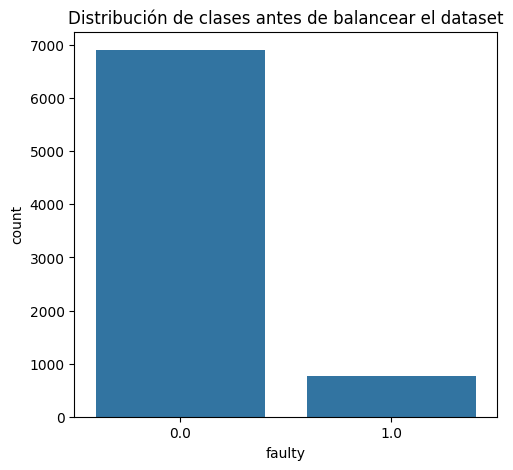

In [40]:
# Gráfico antes de SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=target, data=data)
plt.title('Distribución de clases antes de balancear el dataset')

#### Nota: Como podemos observar, existen un desbalanceo del dataset, que hace que los futuros datos que predigamos con nuestros modelos esten sesgado hacia una clase que es predominate en este caso la clase 0 (No existe fallo en la maquina), lo que predicciones erroneas.

In [41]:
# Usamos SMOTE para balancear el dataset con valores sinteticos
X = data_encoded.drop(columns=[target])
y = data_encoded[target]
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

data_balanced = pd.DataFrame(X_resampled)
data_balanced[target] = y_resampled


# Comprobamos el numero de muestras despues de realizar el balanceo de clases
class_types_res = pd.Series(y_resampled).value_counts()
class_proportion = data_encoded[target].value_counts(normalize=True) * 100

print("Tipos de clases despues del balanceo")
print("Número de muestras despues del balanceo: ", len(X_resampled))
print("Tipos de clases despues del balanceo")
print(class_types_res)


Tipos de clases despues del balanceo
Número de muestras despues del balanceo:  13772
Tipos de clases despues del balanceo
faulty
0    6886
1    6886
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribución después de SMOTE')

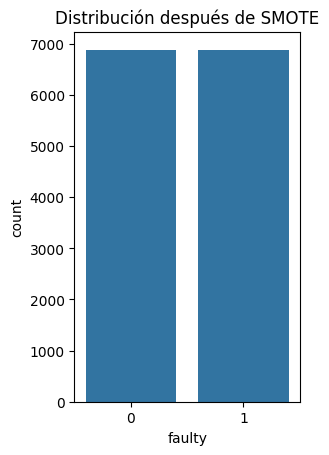

In [42]:
# Gráfico distribución de clases después de SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=target, data=data_balanced)
plt.title('Distribución después de SMOTE')

#### 🔥 4. Mapa de correlación de las variables


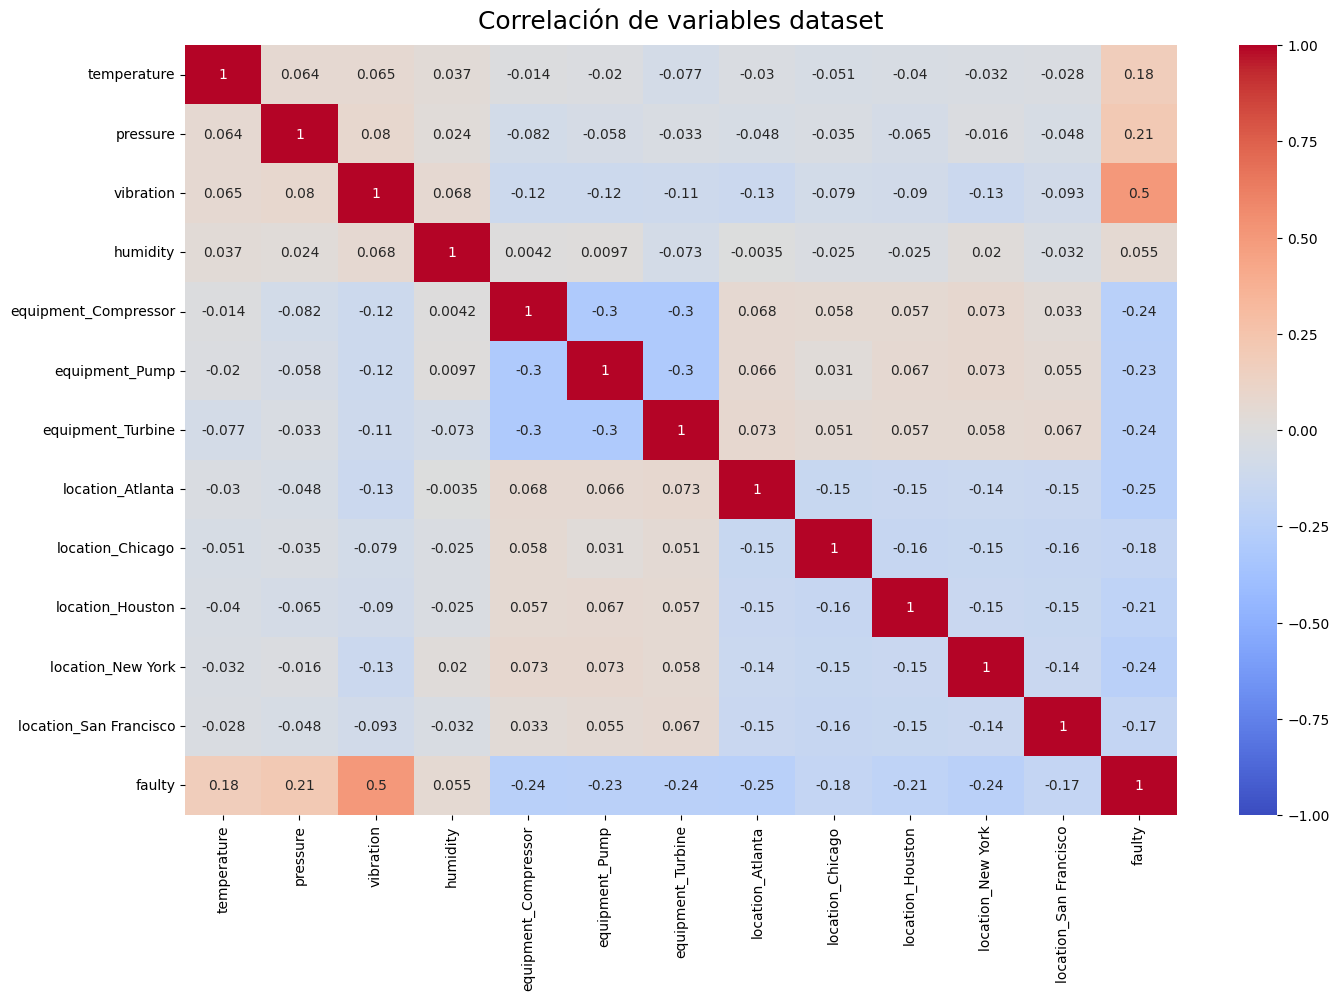

In [43]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data_balanced.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()

#### 📏 4. Normalizacion de los datos
En el siguiente punto vamos a escalar los datos esto nos permite poder entrenar a la red neuronal con los datos escalados en el mismo rango y evitar que la red neuronal, caiga en sesgos.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
data_balanced.head()
cols_to_scale = ['temperature', 'pressure', 'vibration','humidity']
scaler = MinMaxScaler()
data_scaled = data_balanced
data_scaled[cols_to_scale] = scaler.fit_transform(data_scaled[cols_to_scale])

data_scaled.head()

,temperature,pressure,vibration,humidity,equipment_Compressor,equipment_Pump,equipment_Turbine,location_Atlanta,location_Chicago,location_Houston,location_New York,location_San Francisco,faulty
0,0.343641,0.280981,0.190950,0.426743,0,0,1,1,0,0,0,0,0
1,0.469594,0.253744,0.510504,0.361698,1,0,0,0,1,0,0,0,0
2,0.438164,0.310480,0.335390,0.652077,0,0,1,0,0,0,0,1,0
3,0.440017,0.375659,0.405792,0.339567,0,1,0,1,0,0,0,0,0
4,0.403364,0.545684,0.142762,0.385259,0,1,0,0,0,0,1,0,0


#### Como podemos ver el dataset ya esta balanceado, ahora procederemos a entrenar nuestra red neuronal 

#### 🧠 5. Entrenamiento de la red neuronal

In [49]:
X = data_scaled.drop(columns=[target])
y = data_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1])),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/50
276/276 [==============================] - 1s 3ms/step - loss: 0.5557 - accuracy: 0.7108 - val_loss: 0.3823 - val_accuracy: 0.9356
Epoch 2/50
276/276 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9501 - val_loss: 0.1610 - val_accuracy: 0.9587
Epoch 3/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1549 - accuracy: 0.9552 - val_loss: 0.1366 - val_accuracy: 0.9596
Epoch 4/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1420 - accuracy: 0.9582 - val_loss: 0.1310 - val_accuracy: 0.9583
Epoch 5/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9587 - val_loss: 0.1202 - val_accuracy: 0.9655
Epoch 6/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1289 - accuracy: 0.9598 - val_loss: 0.1157 - val_accuracy: 0.9655
Epoch 7/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1227 - accuracy: 0.9614 - val_loss: 0.1121 - val_accuracy: 0.9673
Epoch 

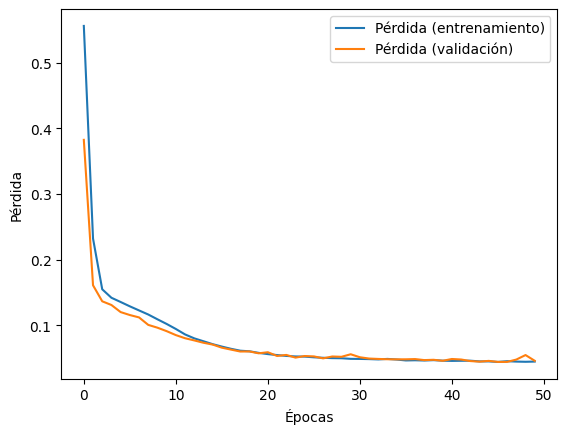

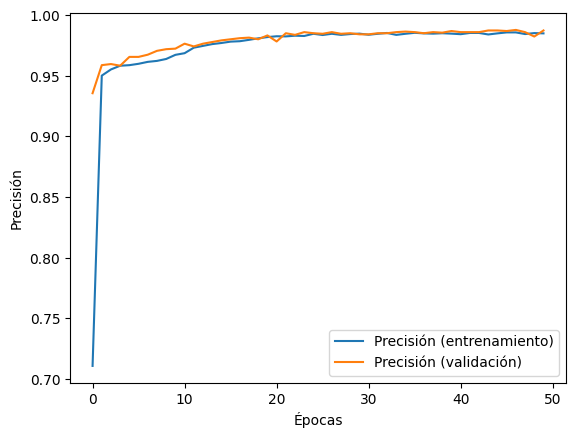

In [51]:
import matplotlib.pyplot as plt 
 
# Pérdida 
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)') 
plt.plot(history.history['val_loss'], label='Pérdida (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Pérdida') 
plt.legend() 
plt.show() 
 
# Precisión 
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)') 
plt.plot(history.history['val_accuracy'], label='Precisión (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Precisión') 
plt.legend() 
plt.show() 

87/87 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1435
           1       0.97      0.99      0.98      1320

    accuracy                           0.98      2755
   macro avg       0.98      0.98      0.98      2755
weighted avg       0.98      0.98      0.98      2755



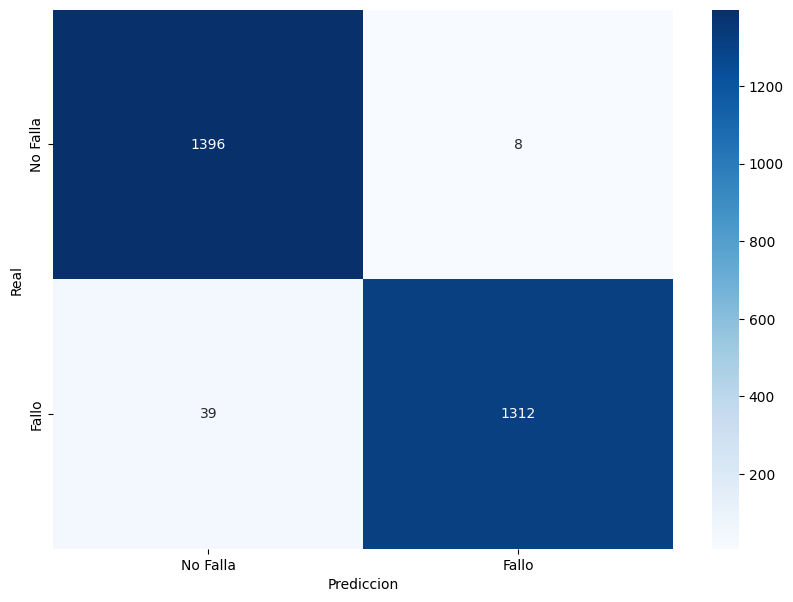

In [56]:
# Matriz de confusion de la red neuronal 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    mean_squared_error, r2_score
)

y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_pred_class, y_test.astype(int)))
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Falla', 'Fallo'], yticklabels=['No Falla', 'Fallo'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

#### 📈 6. Tunning de hiperparametos con Keras Tuner

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    # Numero de caracteristicas
    input_dim = 12
    model.add(layers.Input(shape=(input_dim)))


    # Ajustamos el numero de capas ocultas
    for i in range(hp.Int('num_layers',1,3)):
         # Ajuste del número de neuronas en cada capa (entre 32 y 256, en pasos de 32)
        units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
        model.add(layers.Dense(units, activation='relu'))
        
        # Ajuste del dropout (entre 0 y 0.5, en pasos de 0.1)
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
    # Capa de salida para clasificación binaria
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Ajuste de la tasa de aprendizaje para el optimizador Adam
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [62]:
X_train.shape[1]

12

##### ⚙ 6.1 Configuramos Keras Tuner


In [65]:
# Configuración del tuner
 
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',   # Métrica a optimizar
    max_trials=10,              # Número de combinaciones a probar
    executions_per_trial=1,     # Entrenamiento de cada modelo una vez (puedes aumentar para mayor estabilidad)
    directory='kt_dir',         # Directorio para almacenar resultados
    project_name='tf_binary_classification'
)

Reloading Tuner from kt_dir/tf_binary_classification/tuner0.json


6.2 Definimos un Early Stopping para evitar que se produzca overfitting

In [66]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Ejecutar la búsqueda de hiperparámetros

In [67]:
tuner.search(
    X_train, y_train,
    epochs=50,                        # Número máximo de épocas para cada entrenamiento
    validation_data=(X, y),
    callbacks=[early_stop]
)

Trial 10 Complete [00h 00m 38s]
val_accuracy: 0.9878739714622498

Best val_accuracy So Far: 0.9888178706169128
Total elapsed time: 00h 10m 21s


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obtener el mejor modelo encontrado
best_model = tuner.get_best_models(num_models=1)[0]

# Mostrar los hiperparámetros óptimos
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros:")
print(best_hyperparameters.values)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Pérdida en test: {test_loss:.4f}')
print(f'Exactitud en test: {test_accuracy:.4f}')

Mejores hiperparámetros:
{'num_layers': 2, 'units_0': 160, 'dropout_0': 0.2, 'learning_rate': 0.00046884292239125904, 'units_1': 64, 'dropout_1': 0.4, 'units_2': 192, 'dropout_2': 0.0}
87/87 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9833
Pérdida en test: 0.0535
Exactitud en test: 0.9833
